In [77]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.classes.function import non_neighbors

In [78]:
Budget = 10000
cost_per_nn = 300
income_per_person = 50
threshold = 0.18 
contact_limit =10 
Time_limit = 60 

In [79]:
edge_df = pd.read_csv("edge_list.txt", sep=" ", header=None)
edge_df.columns = ["Edge_1", "Edge_2"]
edge_df.head()

,Edge_1,Edge_2
0,236,186
1,236,84
2,236,62
3,236,142
4,236,252


In [80]:
edges = list(zip(edge_df['Edge_1'].tolist(), edge_df['Edge_2'].tolist()))
edges[:6]

[(236, 186), (236, 84), (236, 62), (236, 142), (236, 252), (236, 169)]

In [81]:
g = nx.Graph()
g.add_edges_from(edges)

Check properties of  nodes (nodes are not sorted and there are some of them missing )

In [82]:
print(sorted(g.nodes))
print (15 in list (g.nodes))
print (len(g.nodes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 

### Create Cost Dictionary

In [83]:
Cost_dict = {}
for node in g.nodes:
  Cost_dict[node] = len(list(g.neighbors(node))) *cost_per_nn

In [84]:
print (Cost_dict)

{236: 10800, 186: 12900, 84: 3600, 62: 7500, 142: 12600, 252: 19200, 169: 11100, 280: 12600, 257: 5100, 297: 7200, 303: 6000, 105: 3900, 276: 5100, 272: 13200, 88: 5700, 271: 21600, 13: 9000, 69: 2700, 133: 5100, 30: 4800, 121: 3300, 21: 19200, 26: 20100, 304: 16200, 122: 18600, 224: 8100, 314: 3600, 315: 16500, 213: 11400, 67: 22500, 318: 3000, 322: 21300, 141: 8100, 25: 20400, 1: 4800, 200: 16800, 248: 6000, 341: 3300, 109: 10800, 55: 4800, 199: 13800, 223: 7800, 178: 3600, 345: 4500, 9: 16800, 277: 19200, 325: 11400, 59: 5400, 123: 5100, 203: 16800, 45: 3300, 104: 9300, 285: 13800, 170: 13500, 128: 8100, 221: 2100, 239: 17400, 188: 14100, 323: 11400, 222: 3000, 56: 23100, 98: 14400, 331: 5700, 113: 11700, 5: 3600, 274: 3900, 284: 4500, 3: 4800, 119: 18300, 136: 39300, 31: 6600, 156: 3300, 261: 11100, 332: 12600, 342: 9900, 161: 7200, 344: 2400, 235: 1200, 176: 3900, 251: 3900, 66: 4200, 232: 7200, 281: 4500, 103: 4500, 146: 2700, 246: 3900, 60: 2100, 208: 1800, 313: 10800, 164: 600,

### Create Threshold Dictionary 

In [85]:
Thre_dict = {}
for node in g.nodes:
  Thre_dict[node] = len(list(g.neighbors(node))) *threshold

In [86]:
print (Thre_dict)

{236: 6.4799999999999995, 186: 7.739999999999999, 84: 2.16, 62: 4.5, 142: 7.56, 252: 11.52, 169: 6.66, 280: 7.56, 257: 3.06, 297: 4.32, 303: 3.5999999999999996, 105: 2.34, 276: 3.06, 272: 7.92, 88: 3.42, 271: 12.959999999999999, 13: 5.3999999999999995, 69: 1.6199999999999999, 133: 3.06, 30: 2.88, 121: 1.98, 21: 11.52, 26: 12.059999999999999, 304: 9.719999999999999, 122: 11.16, 224: 4.859999999999999, 314: 2.16, 315: 9.9, 213: 6.84, 67: 13.5, 318: 1.7999999999999998, 322: 12.78, 141: 4.859999999999999, 25: 12.24, 1: 2.88, 200: 10.08, 248: 3.5999999999999996, 341: 1.98, 109: 6.4799999999999995, 55: 2.88, 199: 8.28, 223: 4.68, 178: 2.16, 345: 2.6999999999999997, 9: 10.08, 277: 11.52, 325: 6.84, 59: 3.2399999999999998, 123: 3.06, 203: 10.08, 45: 1.98, 104: 5.58, 285: 8.28, 170: 8.1, 128: 4.859999999999999, 221: 1.26, 239: 10.44, 188: 8.459999999999999, 323: 6.84, 222: 1.7999999999999998, 56: 13.86, 98: 8.64, 331: 3.42, 113: 7.02, 5: 2.16, 274: 2.34, 284: 2.6999999999999997, 3: 2.88, 119: 1

## Reminder that we need to check the other connected components

In [87]:
number_of_cc = len(sorted(nx.connected_components(g), key=len, reverse=True))
number_of_cc

15

In [88]:
ccList = sorted(nx.connected_components(g), key=len, reverse=True)
ccList

[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  14,
  16,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  38,
  39,
  40,
  41,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  108,
  109,
  110,
  111,
  112,
  113,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,

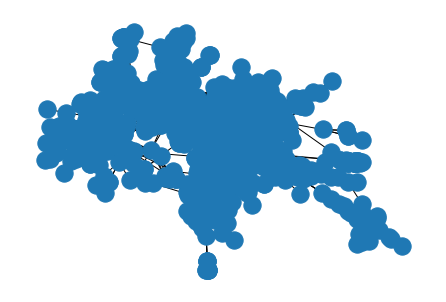

In [89]:
nodeList = sorted(nx.connected_components(g), key=len, reverse=True)[0]
G = g.subgraph(nodeList).copy()
nx.draw(G)

In [90]:
print (len(g.nodes))
print (len(G.nodes))

3953
3732


## Eigenvector_ centrality based on the degree of its nighbors 

In [20]:
highest_degrees_EV = sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)
print (highest_degrees_EV)

[(2266, 0.08751556459812702), (2206, 0.08671452401345466), (2233, 0.0856984284810964), (2464, 0.0849305034348185), (2218, 0.08478828343698398), (2078, 0.08477185499131025), (2142, 0.0847153530285804), (2123, 0.08430471061999159), (1993, 0.08416017194099902), (2410, 0.08412263111394191), (2244, 0.08397759798634385), (2507, 0.08390202097132887), (2340, 0.08369027873622745), (2240, 0.08367305276757443), (2229, 0.08359499715186054), (1985, 0.08310703430640085), (2088, 0.08309101951694213), (2073, 0.08288903344776041), (2220, 0.08278846007822357), (2131, 0.08274292960451671), (2059, 0.08269682142178257), (2604, 0.08268109400738835), (2309, 0.0826213091887351), (2590, 0.08261892657546886), (2369, 0.0823610006958019), (2611, 0.0820939369624756), (2602, 0.08208796655328339), (2607, 0.081847463992109), (2090, 0.0816168341173334), (2188, 0.08156689507389212), (2201, 0.08135963648238635), (2560, 0.08131830241638478), (2586, 0.08103629919636941), (1946, 0.08097106106591703), (1983, 0.0809580223242

In [21]:
iter_length = len(list(G.neighbors(2266)))
iter_length * cost_per_nn

69900

In [ ]:
for k , val in highest_degrees_EV:
  print  ("Node "+str(k)+ ": cost " + str(Cost_dict[k]) + " and a Threshold of " +str(Thre_dict[k])  )

## betweness Centraliy (171 and 1165)

In [91]:
highest_degrees_BC = sorted(nx.betweenness_centrality(G).items(), key=lambda x:x[1], reverse=True)
print (highest_degrees_BC)

[(1085, 0.2011124741099764), (1718, 0.17505296359235403), (1577, 0.10169182133223938), (1405, 0.08875251880967365), (136, 0.08633695508278523), (1534, 0.07177211873821547), (1165, 0.06780623945219029), (171, 0.06543835645107605), (119, 0.06320342152614719), (3830, 0.057349881684331305), (1465, 0.05446224893636376), (563, 0.04785516174882237), (1505, 0.047807831124558), (567, 0.04780306312600298), (2543, 0.04577908564131335), (1666, 0.0450594076204), (3304, 0.0441252151407023), (3561, 0.034707703980990975), (277, 0.033684463485650164), (1420, 0.03226268453696732), (175, 0.03190315278395981), (1086, 0.031540621532979395), (1013, 0.03106414449186253), (1549, 0.029360596407772412), (428, 0.029215142982376263), (1193, 0.02857231441366026), (483, 0.02772734857416163), (1334, 0.027159089448999297), (3263, 0.025369020180438604), (1687, 0.02525448351178178), (594, 0.022805607612270018), (3861, 0.022256913120198715), (19, 0.02177114602625863), (3101, 0.020995866709047694), (2946, 0.0208530811386

In [92]:
iter_length = len(list(G.neighbors(1165)))
iter_length * cost_per_nn

7500

In [93]:
tmp = sorted(highest_degrees_BC, key=lambda x:x[1], reverse=False)
print (tmp)

[(63, 0.0), (191, 0.0), (153, 0.0), (183, 0.0), (234, 0.0), (207, 0.0), (228, 0.0), (46, 0.0), (321, 0.0), (86, 0.0), (102, 0.0), (135, 0.0), (309, 0.0), (267, 0.0), (76, 0.0), (336, 0.0), (273, 0.0), (218, 0.0), (328, 0.0), (195, 0.0), (78, 0.0), (306, 0.0), (262, 0.0), (44, 0.0), (305, 0.0), (220, 0.0), (71, 0.0), (255, 0.0), (241, 0.0), (32, 0.0), (1486, 0.0), (3003, 0.0), (2885, 0.0), (2838, 0.0), (2740, 0.0), (2704, 0.0), (279, 0.0), (131, 0.0), (70, 0.0), (286, 0.0), (293, 0.0), (112, 0.0), (138, 0.0), (316, 0.0), (205, 0.0), (52, 0.0), (216, 0.0), (264, 0.0), (201, 0.0), (110, 0.0), (2814, 0.0), (35, 0.0), (327, 0.0), (47, 0.0), (160, 0.0), (154, 0.0), (393, 0.0), (476, 0.0), (1326, 0.0), (1253, 0.0), (1071, 0.0), (1651, 0.0), (1276, 0.0), (1455, 0.0), (1262, 0.0), (1856, 0.0), (1346, 0.0), (1762, 0.0), (1372, 0.0), (1034, 0.0), (485, 0.0), (1967, 0.0), (1755, 0.0), (1362, 0.0), (1233, 0.0), (1690, 0.0), (1521, 0.0), (945, 0.0), (1016, 0.0), (1403, 0.0), (1176, 0.0), (1546, 0.0)

In [94]:
for k , val in highest_degrees_BC:
  print  ("Node "+str(k)+ ": cost " + str(Cost_dict[k]) + " and a Threshold of " +str(Thre_dict[k])  )

Node 1085: cost 19200 and a Threshold of 11.52
Node 1718: cost 45900 and a Threshold of 27.54
Node 1577: cost 50400 and a Threshold of 30.24
Node 1405: cost 14400 and a Threshold of 8.64
Node 136: cost 39300 and a Threshold of 23.58
Node 1534: cost 9300 and a Threshold of 5.58
Node 1165: cost 7500 and a Threshold of 4.5
Node 171: cost 5700 and a Threshold of 3.42
Node 119: cost 18300 and a Threshold of 10.98
Node 3830: cost 32100 and a Threshold of 19.259999999999998
Node 1465: cost 31800 and a Threshold of 19.08
Node 563: cost 26100 and a Threshold of 15.66
Node 1505: cost 17100 and a Threshold of 10.26
Node 567: cost 18000 and a Threshold of 10.799999999999999
Node 2543: cost 87900 and a Threshold of 52.739999999999995
Node 1666: cost 10200 and a Threshold of 6.12
Node 3304: cost 10200 and a Threshold of 6.12
Node 3561: cost 3900 and a Threshold of 2.34
Node 277: cost 19200 and a Threshold of 11.52
Node 1420: cost 44100 and a Threshold of 26.459999999999997
Node 175: cost 4800 and a 

## Load Centrality

In [27]:
highest_degrees_Load = sorted(nx.load_centrality(G).items(), key=lambda x:x[1], reverse=True)
print (highest_degrees_Load)

[(1085, 0.19971837728198058), (1718, 0.1599923904410946), (1577, 0.10104723726410053), (136, 0.08007344280398142), (1405, 0.07617501708897854), (1534, 0.0699679627482099), (171, 0.06908684235849619), (1165, 0.06695135820244268), (119, 0.06651429389962564), (1465, 0.06403291696178585), (3830, 0.05784940408640338), (567, 0.0494393486811988), (563, 0.049198409592683186), (1505, 0.04878367581738529), (1666, 0.047023300382639084), (2543, 0.04314356756889719), (3304, 0.03625860781846778), (3561, 0.03487007658899693), (277, 0.03432550987301248), (1013, 0.032956069880383965), (175, 0.0324471163316489), (1549, 0.030698472779949925), (428, 0.030394642850897803), (1193, 0.02942745267998295), (1420, 0.027156577823653206), (1334, 0.02702733212744552), (483, 0.026881910770521742), (1086, 0.02589495580403378), (1687, 0.0255051615575197), (3263, 0.023583638722381974), (3861, 0.02293883951809866), (594, 0.022823823412249363), (19, 0.022067839109515937), (3101, 0.020727573175046272), (3168, 0.0202395768

In [ ]:
for k , val in highest_degrees_Load:
  print  ("Node "+str(k)+ ": cost " + str(Cost_dict[k]) + " and a Threshold of " +str(Thre_dict[k])  )

## closeness_centrality

In [29]:
highest_degrees_CC = sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)
print (highest_degrees_CC)

[(1835, 0.282010582010582), (1718, 0.2819253438113949), (1376, 0.2802944932762377), (1173, 0.28023133543638273), (1509, 0.2789115646258503), (1534, 0.27803860198226393), (1312, 0.27667779013718946), (1165, 0.2766572742102922), (1334, 0.2750055281197022), (1182, 0.27476250092053905), (1590, 0.27474226804123714), (1352, 0.27363403006967363), (1513, 0.2732132396016403), (1029, 0.2731132420759827), (1663, 0.2730732635585157), (1369, 0.2724948875255624), (1540, 0.27104976389393387), (1522, 0.27093166799796675), (1621, 0.270342728787769), (925, 0.2702448210922787), (1126, 0.26967835200578244), (1577, 0.26884277273382334), (1361, 0.2686491935483871), (1327, 0.26837865055387716), (1074, 0.26701495741787734), (921, 0.26695764167143676), (1702, 0.266843083965098), (1485, 0.26680491990846683), (1846, 0.26659521257591995), (1329, 0.26587329865317466), (1687, 0.2656083149426924), (1523, 0.2653816060886265), (1622, 0.26397339748125087), (1465, 0.26371218546791064), (1666, 0.26348870056497176), (1420

In [ ]:
for k , val in highest_degrees_CC:
  print  ("Node "+str(k)+ ": cost " + str(Cost_dict[k]) + " and a Threshold of " +str(Thre_dict[k])  )

## degree_centrality

In [31]:

highest_degrees_DC = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)
print (highest_degrees_DC)

[(2543, 0.0785312248726883), (2347, 0.07772715089788261), (1888, 0.06781023854194586), (1800, 0.06539801661752881), (1663, 0.0627177700348432), (1352, 0.06244974537657465), (2266, 0.06244974537657465), (483, 0.06110962208523184), (1730, 0.06030554811042616), (1985, 0.059769498793889035), (1941, 0.05950147413562048), (2233, 0.059233449477351915), (2142, 0.05896542481908336), (1431, 0.058697400160814796), (1199, 0.05789332618600911), (1584, 0.05628517823639775), (2206, 0.05601715357812919), (1768, 0.05574912891986063), (2229, 0.05521307960332351), (2611, 0.05521307960332351), (2410, 0.05521307960332351), (1589, 0.05467703028678639), (1086, 0.05467703028678639), (2047, 0.05467703028678639), (2218, 0.05467703028678639), (2078, 0.054409005628517824), (2123, 0.05414098097024926), (1993, 0.05414098097024926), (1746, 0.053872956311980705), (2464, 0.053872956311980705), (1827, 0.05360493165371214), (2507, 0.05360493165371214), (2560, 0.05360493165371214), (2240, 0.05360493165371214), (2244, 0.0

In [ ]:
for k , val in highest_degrees_DC:
  print  ("Node "+str(k)+ ": cost " + str(Cost_dict[k]) + " and a Threshold of " +str(Thre_dict[k])  )

## Example of activation Function for a random value 

In [33]:
#active_nodes = {}
#for node in g.nodes:
#  active_nodes[node] = 0 

In [34]:
#first Example 
#active_nodes[1165] = 1 
#active_nodes[1193] = 1

In [35]:
#tmp_an = active_nodes.copy()
#tmp_an[171] = 0 

In [36]:
#print (active_nodes[171])
#print (tmp_an[171])
#output = []
#output.append(list(active_nodes.copy().values()))
#print (output)

1
0
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [19]:

for node in G.neighbors(1085):
  print (str(node)  + " costs is " + str (Cost_dict[node]) )

1193 costs is 2400
1553 costs is 10800
1420 costs is 44100
1847 costs is 7500
1178 costs is 3600
1317 costs is 6000
1165 costs is 7500
1098 costs is 6600
1593 costs is 9300
1360 costs is 10800
1567 costs is 9600
1537 costs is 5400
1518 costs is 3900
1136 costs is 9600
1825 costs is 8400
1410 costs is 6000
1187 costs is 5700
1307 costs is 9000
1866 costs is 9000
1687 costs is 12600
1555 costs is 10200
1705 costs is 7800
1803 costs is 7200
1719 costs is 5400
1511 costs is 8700
1328 costs is 5700
1421 costs is 6900
1588 costs is 6600
1088 costs is 3900
1274 costs is 7200
1806 costs is 9300
1494 costs is 7500
3721 costs is 8700
3651 costs is 9300
3684 costs is 19800
3948 costs is 17400
3872 costs is 3900
3886 costs is 8400
3756 costs is 18000
3962 costs is 11400
3540 costs is 9900
3501 costs is 14700
3877 costs is 16200
3577 costs is 15300
3633 costs is 19200
3592 costs is 3600
3943 costs is 7200
3609 costs is 7800
3495 costs is 16500
3692 costs is 11100
3456 costs is 15000
3550 costs is 5

## linear Threshold 

In [95]:
nodes_arr = np.array(g.nodes) 
print (nodes_arr)
mapp_dic = {k: v for v, k in enumerate(nodes_arr)}
reverse_mapp_dic = {v: k for v, k in enumerate(nodes_arr)}
print (mapp_dic)
print (reverse_mapp_dic)

[ 236  186   84 ... 4007 4012 3987]
{236: 0, 186: 1, 84: 2, 62: 3, 142: 4, 252: 5, 169: 6, 280: 7, 257: 8, 297: 9, 303: 10, 105: 11, 276: 12, 272: 13, 88: 14, 271: 15, 13: 16, 69: 17, 133: 18, 30: 19, 121: 20, 21: 21, 26: 22, 304: 23, 122: 24, 224: 25, 314: 26, 315: 27, 213: 28, 67: 29, 318: 30, 322: 31, 141: 32, 25: 33, 1: 34, 200: 35, 248: 36, 341: 37, 109: 38, 55: 39, 199: 40, 223: 41, 178: 42, 345: 43, 9: 44, 277: 45, 325: 46, 59: 47, 123: 48, 203: 49, 45: 50, 104: 51, 285: 52, 170: 53, 128: 54, 221: 55, 239: 56, 188: 57, 323: 58, 222: 59, 56: 60, 98: 61, 331: 62, 113: 63, 5: 64, 274: 65, 284: 66, 3: 67, 119: 68, 136: 69, 31: 70, 156: 71, 261: 72, 332: 73, 342: 74, 161: 75, 344: 76, 235: 77, 176: 78, 251: 79, 66: 80, 232: 81, 281: 82, 103: 83, 146: 84, 246: 85, 60: 86, 208: 87, 313: 88, 164: 89, 117: 90, 185: 91, 196: 92, 211: 93, 10: 94, 24: 95, 346: 96, 302: 97, 53: 98, 80: 99, 187: 100, 249: 101, 299: 102, 92: 103, 266: 104, 180: 105, 194: 106, 94: 107, 101: 108, 57: 109, 242: 1

In [96]:
active_nodes = np.zeros(len(g.nodes))
print(active_nodes)
print (mapp_dic[1165])
print (nodes_arr[1251])
active_nodes[mapp_dic[1165]] = 1
active_nodes[mapp_dic[1193]] = 1


[0. 0. 0. ... 0. 0. 0.]
1251
1165


In [97]:
thresholds = np.zeros(len(g.nodes))
for i in range(0,len(thresholds)):
  thresholds[i] = Thre_dict[reverse_mapp_dic[i]]
print (thresholds)
print (Thre_dict[186])

[6.48 7.74 2.16 ... 0.54 0.18 0.18]
7.739999999999999


pay attention now active_nodes is dict

In [98]:
def linear_threshold(G, active_nodes, thresholds,mapp_dic,reverse_mapp_dic):
    #tmp_active_nodes = np.copy(active_nodes)
    n = len(active_nodes)
    output = []
    #append initial case 
    output.append(active_nodes.copy())
    an_array = active_nodes.copy()
    break_var = True
    while(break_var):
      tmp_active_nodes = np.zeros(n)
      for node in range(0,n):
        #active nodes remain active
        if (an_array[node] == 1):
          tmp_active_nodes[node] = 1
        #inactive nodes 
        else:
          tmp_sum = 0 
          n_neighbors = 0
          for nigh_node in G.neighbors(reverse_mapp_dic[node]):
            if(an_array[mapp_dic[nigh_node]] == 1):
              tmp_sum = tmp_sum +1

          #for nigh_node in G.predecessors(node):
          #sum = np.sum(np.array(G.neighbors(reverse_mapp_dic[node])))
          #print(sum)
          if (tmp_sum >= thresholds[node] ):
            tmp_active_nodes [node] = 1
          #for nigh_node in G.neighbors(node):
           # n_neighbors = n_neighbors +1
            #if(an_array[nigh_node] == 1):
             # tmp_sum = tmp_sum +1
          #share = 0 
          #if n_neighbors!= 0:
           # share = tmp_sum /n_neighbors 
          #else:

          #either become active > threshold
          #if (share >= thresholds[node]):
           # tmp_active_nodes [node] = 1
          #or remain inactive
          else:
            tmp_active_nodes [node] = 0
        
      if (np.array_equal(an_array, tmp_active_nodes)):
        break_var = False
        #output.append(tmp_active_nodes.copy())
      for node in range(0,n):
         an_array[node] = tmp_active_nodes[node]
      output.append(an_array.copy())
    return np.array(output)

In [99]:
output = linear_threshold(g,active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
print(np.sum(output[-1]))

701.0


## Get affected nodes from output

In [100]:
def get_affected_nodes(active_nodes , reverse_mapp_dic ):
  affected_nodes = []
  for i in range (0, len (active_nodes)):
    if (active_nodes[i] == 1):
      affected_nodes.append(reverse_mapp_dic[i])
  return affected_nodes

In [101]:
affected_nodes = get_affected_nodes(output[-1],reverse_mapp_dic)
print (affected_nodes)
print (1165 in affected_nodes)

[269, 171, 58, 1297, 1486, 904, 1171, 1387, 1193, 3003, 2885, 2838, 2740, 3290, 2704, 286, 81, 649, 3173, 2814, 1553, 1670, 1437, 1863, 1846, 1405, 1544, 1594, 1369, 1561, 1618, 1327, 1411, 1283, 1200, 1202, 1268, 1326, 1858, 1077, 1253, 1071, 1860, 1458, 922, 1852, 998, 1698, 1140, 1534, 1674, 1527, 1909, 1847, 923, 1505, 1178, 961, 1317, 1758, 996, 1450, 973, 990, 1552, 1477, 1666, 929, 991, 1165, 1384, 1098, 1593, 1656, 1701, 1461, 1087, 1445, 1008, 3245, 3168, 2760, 3386, 2678, 3079, 3020, 2764, 2964, 2734, 2968, 2883, 2826, 3205, 3164, 3165, 3409, 2976, 3011, 3258, 3019, 3062, 2725, 3005, 3278, 1702, 1883, 1911, 1337, 1780, 1626, 1419, 1440, 1360, 1585, 950, 1321, 908, 1697, 1150, 1805, 1567, 1045, 1441, 1865, 1161, 951, 1537, 1518, 1817, 1197, 1434, 1905, 1564, 1266, 1055, 1779, 1085, 1136, 1825, 1410, 1187, 1307, 1866, 1687, 1555, 1705, 1803, 1719, 1511, 1328, 1421, 1588, 1088, 1274, 1806, 1494, 1038, 1301, 1678, 1433, 1033, 1144, 1203, 1325, 1615, 900, 1498, 1856, 1220, 1346, 1

finding candidates :

1718 already = 18 , threshold = 27

119 already = 2 , threshold = 11


In [102]:
print ( 23 in affected_nodes)

False


In [103]:
ne = []
ne1 = []
for nn in g.neighbors(23):
  ne.append(nn)

print (ne)
for nn in ne:
  if nn in affected_nodes:
    ne1.append(nn)
print (ne1)
print (len(ne1))

[175, 116, 83, 230, 227, 61, 144, 245, 190, 240, 99, 267, 51, 237, 155, 124]
[]
0


## 2-phase inhancment

In [104]:
new_active_nodes = output[-1].copy()
affected_nodes = get_affected_nodes(output[-1],reverse_mapp_dic)
Enhancment = []
for node in G.nodes:
  if (node not in affected_nodes):
    tmp_active_nodes = new_active_nodes.copy()
    tmp_active_nodes[mapp_dic[node]] = 1
    tmp_output = linear_threshold(g,tmp_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
    Enhancment.append((node ,np.sum(tmp_output[-1]), Cost_dict[node]))

#print(np.sum(output[-1]))

In [105]:
tmp = sorted(Enhancment, key=lambda x:x[1], reverse=True)
print (tmp)

[(1304, 1500.0, 11100), (3674, 1194.0, 11100), (3677, 1194.0, 14700), (3775, 1194.0, 2400), (3610, 1194.0, 4200), (3847, 1194.0, 3600), (2745, 932.0, 9600), (2313, 928.0, 25200), (2558, 928.0, 6300), (2450, 928.0, 3300), (2113, 928.0, 2700), (2439, 928.0, 2700), (2263, 928.0, 1800), (2548, 928.0, 2100), (2528, 928.0, 1800), (2217, 928.0, 3600), (3791, 813.0, 6000), (428, 774.0, 33300), (310, 770.0, 3600), (137, 770.0, 4500), (167, 770.0, 1800), (93, 770.0, 2100), (337, 770.0, 2400), (594, 746.0, 1800), (4011, 746.0, 900), (3989, 746.0, 1500), (4031, 746.0, 3000), (4038, 746.0, 2400), (4014, 746.0, 3300), (4023, 746.0, 5100), (4004, 746.0, 2700), (4013, 746.0, 1500), (3982, 746.0, 3900), (4030, 746.0, 5400), (3985, 746.0, 1500), (3986, 746.0, 2400), (3995, 746.0, 2400), (4017, 746.0, 2400), (4000, 746.0, 2400), (3991, 746.0, 600), (3988, 746.0, 1800), (3993, 746.0, 1500), (119, 737.0, 18300), (329, 737.0, 8700), (175, 734.0, 4800), (278, 734.0, 2700), (263, 734.0, 1800), (143, 734.0, 33

## 3-phase inhancment

In [106]:
new_active_nodes = output[-1].copy()

#print (sum(new_active_nodes))
new_active_nodes[mapp_dic[3775]] = 1
tmp_output = linear_threshold(g,new_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
print (sum(tmp_output[-1]))

1194.0


In [107]:
new_active_nodes = tmp_output[-1].copy()
affected_nodes = get_affected_nodes(tmp_output[-1],reverse_mapp_dic)
Enhancment = []
for node in G.nodes:
  if (node not in affected_nodes):
    tmp_active_nodes = new_active_nodes.copy()
    tmp_active_nodes[mapp_dic[node]] = 1
    tmp_output = linear_threshold(g,tmp_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
    Enhancment.append((node ,np.sum(tmp_output[-1]), Cost_dict[node]))

#print(np.sum(output[-1]))

In [108]:
tmp = sorted(Enhancment, key=lambda x:x[1], reverse=True)
print (tmp)

[(1304, 1993.0, 11100), (2745, 1425.0, 9600), (2313, 1421.0, 25200), (2558, 1421.0, 6300), (2450, 1421.0, 3300), (2113, 1421.0, 2700), (2439, 1421.0, 2700), (2263, 1421.0, 1800), (2548, 1421.0, 2100), (2528, 1421.0, 1800), (2217, 1421.0, 3600), (428, 1267.0, 33300), (310, 1263.0, 3600), (137, 1263.0, 4500), (167, 1263.0, 1800), (93, 1263.0, 2100), (337, 1263.0, 2400), (594, 1239.0, 1800), (4011, 1239.0, 900), (3989, 1239.0, 1500), (4031, 1239.0, 3000), (4038, 1239.0, 2400), (4014, 1239.0, 3300), (4023, 1239.0, 5100), (4004, 1239.0, 2700), (4013, 1239.0, 1500), (3982, 1239.0, 3900), (4030, 1239.0, 5400), (3985, 1239.0, 1500), (3986, 1239.0, 2400), (3995, 1239.0, 2400), (4017, 1239.0, 2400), (4000, 1239.0, 2400), (3991, 1239.0, 600), (3988, 1239.0, 1800), (3993, 1239.0, 1500), (119, 1230.0, 18300), (329, 1230.0, 8700), (175, 1227.0, 4800), (278, 1227.0, 2700), (263, 1227.0, 1800), (143, 1227.0, 3300), (99, 1227.0, 3600), (177, 1227.0, 3000), (296, 1227.0, 1800), (225, 1227.0, 2700), (227

## 4-phase inhancment

In [109]:
new_active_nodes = tmp_output[-1].copy()

print (sum(new_active_nodes))
new_active_nodes[mapp_dic[2528]] = 1
tmp_output1 = linear_threshold(g,new_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
print (sum(tmp_output1[-1]))

1196.0
1423.0


In [110]:
new_active_nodes = tmp_output1[-1].copy()
affected_nodes = get_affected_nodes(tmp_output1[-1],reverse_mapp_dic)
Enhancment = []
for node in G.nodes:
  if (node not in affected_nodes):
    tmp_active_nodes = new_active_nodes.copy()
    tmp_active_nodes[mapp_dic[node]] = 1
    tmp_output = linear_threshold(g,tmp_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
    Enhancment.append((node ,np.sum(tmp_output[-1]), Cost_dict[node]))

#print(np.sum(output[-1]))

In [111]:
tmp = sorted(Enhancment, key=lambda x:x[1], reverse=True)
print (tmp)

[(1509, 2573.0, 39000), (1637, 2573.0, 29400), (1835, 2573.0, 54300), (1376, 2573.0, 54300), (1612, 2573.0, 56700), (1420, 2573.0, 44100), (1845, 2573.0, 30000), (946, 2573.0, 49500), (1048, 2573.0, 31500), (1304, 2219.0, 11100), (2451, 1724.0, 32400), (2032, 1724.0, 43800), (1955, 1724.0, 27300), (2417, 1724.0, 20700), (2629, 1724.0, 37800), (2384, 1724.0, 56100), (2589, 1724.0, 23400), (2327, 1724.0, 37200), (2247, 1724.0, 36300), (2199, 1724.0, 52200), (2267, 1724.0, 24600), (2649, 1724.0, 36300), (2128, 1724.0, 27300), (2054, 1724.0, 48600), (2511, 1724.0, 41700), (2292, 1724.0, 42300), (2398, 1724.0, 32100), (2491, 1724.0, 36000), (2543, 1724.0, 87900), (2254, 1724.0, 26700), (2283, 1724.0, 48000), (2510, 1724.0, 41100), (2268, 1724.0, 38700), (1939, 1724.0, 23400), (2223, 1724.0, 34500), (2111, 1724.0, 54900), (2598, 1724.0, 48900), (2072, 1724.0, 38400), (2471, 1724.0, 39300), (2153, 1724.0, 41400), (1945, 1724.0, 43500), (2081, 1724.0, 51300), (2508, 1724.0, 29100), (2279, 1724

In [ ]:
affected_nodes = get_affected_nodes(output[-1],reverse_mapp_dic)
print (affected_nodes)
print (1165 in affected_nodes)

In [ ]:
print ( 23 in affected_nodes)

In [ ]:
ne = []
ne1 = []
for nn in g.neighbors(23):
  ne.append(nn)

print (ne)
for nn in ne:
  if nn in affected_nodes:
    ne1.append(nn)
print (ne1)
print (len(ne1))

## 5-phase inhancment

In [112]:
new_active_nodes = tmp_output1[-1].copy()

print (sum(new_active_nodes))
new_active_nodes[mapp_dic[2568]] = 1
tmp_output2 = linear_threshold(g,new_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
print (sum(tmp_output2[-1]))

1423.0
1724.0


In [113]:
new_active_nodes = tmp_output2[-1].copy()
affected_nodes = get_affected_nodes(tmp_output2[-1],reverse_mapp_dic)
Enhancment = []
for node in G.nodes:
  if (node not in affected_nodes):
    tmp_active_nodes = new_active_nodes.copy()
    tmp_active_nodes[mapp_dic[node]] = 1
    tmp_output = linear_threshold(g,tmp_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
    Enhancment.append((node ,np.sum(tmp_output[-1]), Cost_dict[node]))

#print(np.sum(output[-1]))

In [114]:
tmp = sorted(Enhancment, key=lambda x:x[1], reverse=True)
print (tmp)

[(1590, 2872.0, 26100), (1509, 2872.0, 39000), (1637, 2872.0, 29400), (897, 2872.0, 19500), (1460, 2872.0, 13500), (1799, 2872.0, 45300), (1835, 2872.0, 54300), (1480, 2872.0, 27600), (1175, 2872.0, 39300), (1376, 2872.0, 54300), (1612, 2872.0, 56700), (1420, 2872.0, 44100), (1735, 2872.0, 32400), (1845, 2872.0, 30000), (1130, 2872.0, 19500), (946, 2872.0, 49500), (1449, 2872.0, 26700), (1305, 2872.0, 30900), (1765, 2872.0, 19500), (1398, 2872.0, 12900), (1312, 2872.0, 23700), (1272, 2872.0, 24900), (1639, 2872.0, 23100), (1782, 2872.0, 19800), (1048, 2872.0, 31500), (1304, 2518.0, 11100), (213, 1974.0, 11400), (119, 1974.0, 18300), (324, 1974.0, 7500), (329, 1974.0, 8700), (2745, 1955.0, 9600), (310, 1793.0, 3600), (137, 1793.0, 4500), (167, 1793.0, 1800), (93, 1793.0, 2100), (337, 1793.0, 2400), (428, 1793.0, 33300), (594, 1767.0, 1800), (4011, 1767.0, 900), (3989, 1767.0, 1500), (4031, 1767.0, 3000), (4038, 1767.0, 2400), (4014, 1767.0, 3300), (4027, 1767.0, 1800), (4023, 1767.0, 51

## 6-phase inhancment

In [115]:
new_active_nodes = tmp_output2[-1].copy()

print (sum(new_active_nodes))
new_active_nodes[mapp_dic[1304]] = 1
tmp_output3 = linear_threshold(g,new_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
print (sum(tmp_output3[-1]))

1724.0
2518.0


In [116]:
new_active_nodes = tmp_output3[-1].copy()
affected_nodes = get_affected_nodes(tmp_output3[-1],reverse_mapp_dic)
Enhancment = []
for node in G.nodes:
  if (node not in affected_nodes):
    tmp_active_nodes = new_active_nodes.copy()
    tmp_active_nodes[mapp_dic[node]] = 1
    tmp_output = linear_threshold(g,tmp_active_nodes,thresholds,mapp_dic,reverse_mapp_dic)
    Enhancment.append((node ,np.sum(tmp_output[-1]), Cost_dict[node]))

#print(np.sum(output[-1]))

In [117]:
tmp = sorted(Enhancment, key=lambda x:x[1], reverse=True)
print (tmp)

[(1590, 2872.0, 26100), (1056, 2872.0, 19200), (1173, 2872.0, 34200), (1160, 2872.0, 26100), (1029, 2872.0, 23400), (995, 2872.0, 19500), (1377, 2872.0, 56700), (1842, 2872.0, 35400), (1470, 2872.0, 21000), (1509, 2872.0, 39000), (1222, 2872.0, 42300), (1637, 2872.0, 29400), (897, 2872.0, 19500), (1861, 2872.0, 29400), (1730, 2872.0, 67500), (1620, 2872.0, 38100), (1688, 2872.0, 28200), (1768, 2872.0, 62400), (1460, 2872.0, 13500), (1799, 2872.0, 45300), (1570, 2872.0, 36900), (1835, 2872.0, 54300), (1535, 2872.0, 18900), (1480, 2872.0, 27600), (1175, 2872.0, 39300), (1376, 2872.0, 54300), (1557, 2872.0, 45000), (1612, 2872.0, 56700), (1420, 2872.0, 44100), (1735, 2872.0, 32400), (1845, 2872.0, 30000), (1074, 2872.0, 18600), (1130, 2872.0, 19500), (946, 2872.0, 49500), (1449, 2872.0, 26700), (1305, 2872.0, 30900), (1528, 2872.0, 20700), (1765, 2872.0, 19500), (1398, 2872.0, 12900), (1312, 2872.0, 23700), (1272, 2872.0, 24900), (1329, 2872.0, 40500), (1639, 2872.0, 23100), (1782, 2872.0

##Check second Largest CC

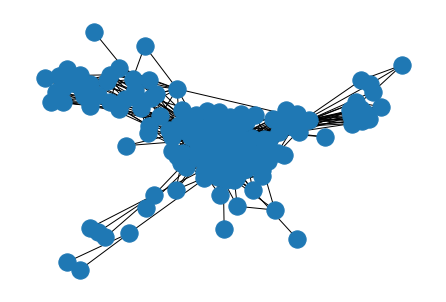

In [29]:
nodeList = sorted(nx.connected_components(g), key=len, reverse=True)[1]
G1 = g.subgraph(nodeList).copy()
nx.draw(G1)

In [31]:
highest_degrees_BC_2cc = sorted(nx.betweenness_centrality(G1).items(), key=lambda x:x[1], reverse=True)
for k,v in highest_degrees_BC_2cc:
  print  ("Node "+str(k)+ ": cost " + str(Cost_dict[k]) + " and a Threshold of " +str(Thre_dict[k])  )

Node 713: cost 20700 and a Threshold of 12.42
Node 856: cost 11100 and a Threshold of 6.66
Node 828: cost 23100 and a Threshold of 13.86
Node 818: cost 4500 and a Threshold of 2.6999999999999997
Node 694: cost 15900 and a Threshold of 9.54
Node 688: cost 13200 and a Threshold of 7.92
Node 805: cost 19200 and a Threshold of 11.52
Node 697: cost 15000 and a Threshold of 9.0
Node 705: cost 20400 and a Threshold of 12.24
Node 719: cost 18600 and a Threshold of 11.16
Node 747: cost 16500 and a Threshold of 9.9
Node 739: cost 8400 and a Threshold of 5.04
Node 829: cost 9900 and a Threshold of 5.9399999999999995
Node 798: cost 1500 and a Threshold of 0.8999999999999999
Node 771: cost 4200 and a Threshold of 2.52
Node 745: cost 16500 and a Threshold of 9.9
Node 804: cost 4200 and a Threshold of 2.52
Node 724: cost 13800 and a Threshold of 8.28
Node 782: cost 3600 and a Threshold of 2.16
Node 833: cost 4200 and a Threshold of 2.52
Node 757: cost 900 and a Threshold of 0.54
Node 770: cost 7800 a